# Anomalies of the Equatorial Ionosphere II
#### By Amadi Brians C.
##### bamadi@brianspace.org

In [32]:
#=========== Import Packages ==============

import os
import glob
import shutil
import matplotlib
import numpy as np
import pandas as pd
import datetime as dt
from pathlib import Path
import cartopy.crs as ccrs
from netCDF4 import Dataset 
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import cartopy.feature as cfeature
from netCDF4 import date2num, num2date
import matplotlib.gridspec as gridspec
from IPython.display import Video, display, HTML
import matplotlib.image as mpimg

import sys
import requests
import datetime
from urllib.parse import quote

#This user-defined package contains instruction for downloading
#download some files from zenodo, necessary to make 
#some plots such as magnetic equator, etc.
sys.path.append("..")  # path to your helper script folder
from utils.zenodo_tools import get_from_zenodo
from utils.get_dependencies import ensure_dependencies

In [2]:
#This code downloads the files and packages
#into a folder named dependencies
ensure_dependencies()

✔ convert_waccmx_datesec.py already exists. Skipping download.
✔ sha.py already exists. Skipping download.
✔ igrf13coeffs.txt already exists. Skipping download.
✔ mag2geo_all.csv already exists. Skipping download.


In [3]:
#Import User-defined packages and files downloaded
sys.path.append("..")  # adjust if needed
from dependencies.convert_waccmx_datesec import *   # or import specific functions
import dependencies.sha as sha

from read_gold import get_gold_paths, read_gold_files_v2, plot_gold_maps2, plot_edens2

In [4]:
#Read the magnetic equator file
BASE_DIR = os.getcwd()  # current working directory
mag2geo = os.path.join(BASE_DIR, "dependencies", "mag2geo_all.csv")
df2 = pd.read_csv(mag2geo, delim_whitespace = False, header = 0)

In [5]:
# ===== File with WACCM-X EDens =====
wacx = Dataset('../data/WACCMX_subset.nc')

### Equatorial Ionization Anomaly (EIA)

- First, let's visualize the EIA. Assuming you take a ride into space, from the magnetic equator to about 300 km above Earth's surface. Take about 5 steps southward. You will observe an obstruction; a mountain of plasma with its summit or peak at a magnetic latitude of about $15^o$. 

- Turn North, and see if you can see a similar structure. Yes, you will observe a similar mountain with a peak at about the same magnetic latitude. These two mountains of plasma on either side of the magnetic equator are the **CRESTS**. Together with the depleted region **(TROUGH)** between the two crests, they form the **Equatorial Ionization Anomaly (EIA)**.

- In some texts, this structure is referred to as a hump of plasma on either side of the magnetic equator with peak at about $\pm15^o$. This hump-like plasma shape is shown in Figure 6.1.

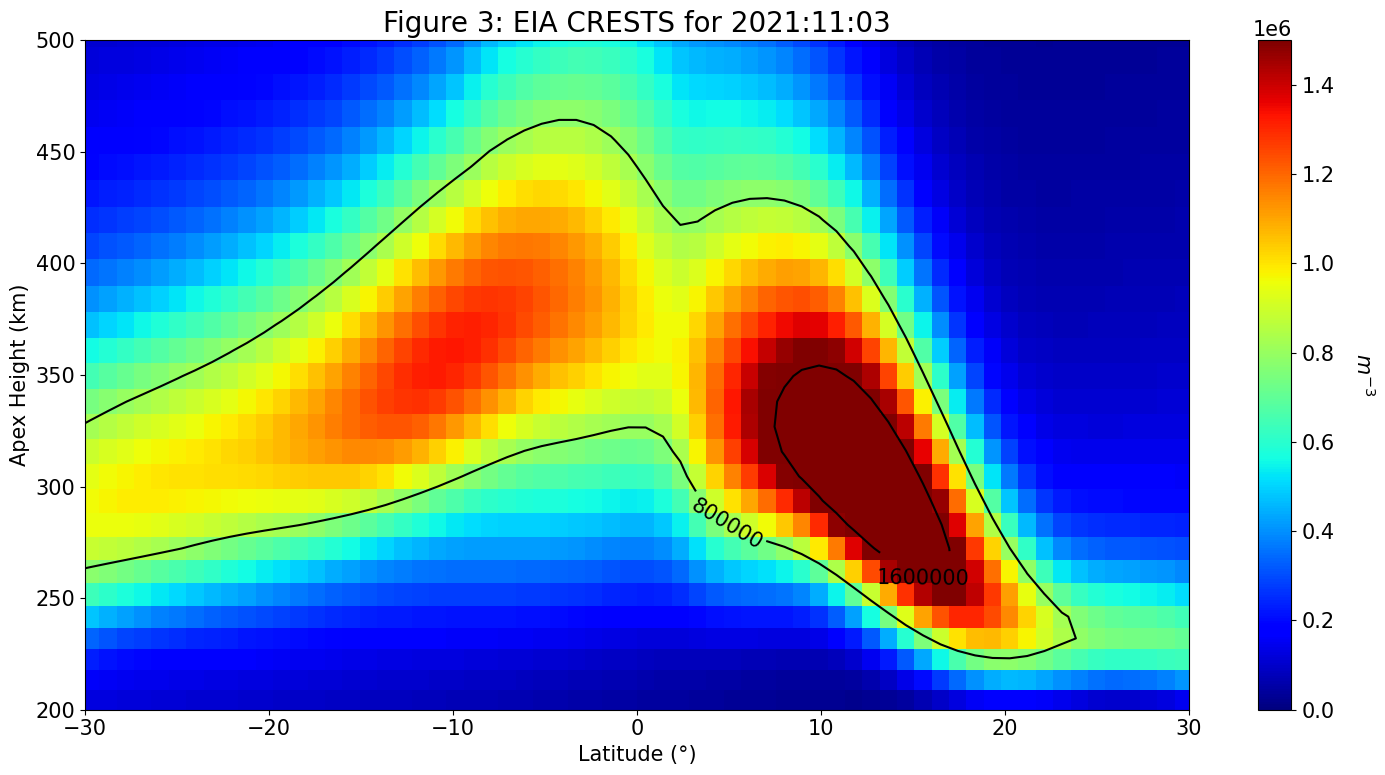

In [6]:
# ===== Choose Time Variable =====
wac_time = wacx['time'][:] 

plot_edens2(wacx)

- Although the density of plasma can vary within the anomaly, the bulk of plasma is concentrated at about 300 to 400km.

#### Formation of EIA

- In previous conversations, we talked about zonal electric field. We tried to understand its source and orientation under various sources. One of the fields we discussed is the zonal electric field; directed eastward during the day but westward after sunset.

- On the other hand, remember that magnetic field is directed northward. The cross (interaction) between these vectors causes plasma to drift in a direction perpendicular to the Electric-magnetic fields plane as illustrated below.

\begin{equation}
V_{E \times B} = \frac{\textbf{E} \times \textbf{B}}{B^2}
\end{equation}

- The result of this process is the upward lift of plasma, and a subsequent poleward drift (pressure gradient), thereby forming a fountain-like structure, commonly called the **FOUNTAIN (MOUNTAIN) EFFECT** in aeronomy circles. See Figure 6.2 for illustration and [Electrodynamic Variables II](notebooks/Electrodynamic_variables_2.ipynb) and [Electrodynamic Variables I](notebooks/Electrodynamic_variables_1.ipynb) for more details about the source of these fields.

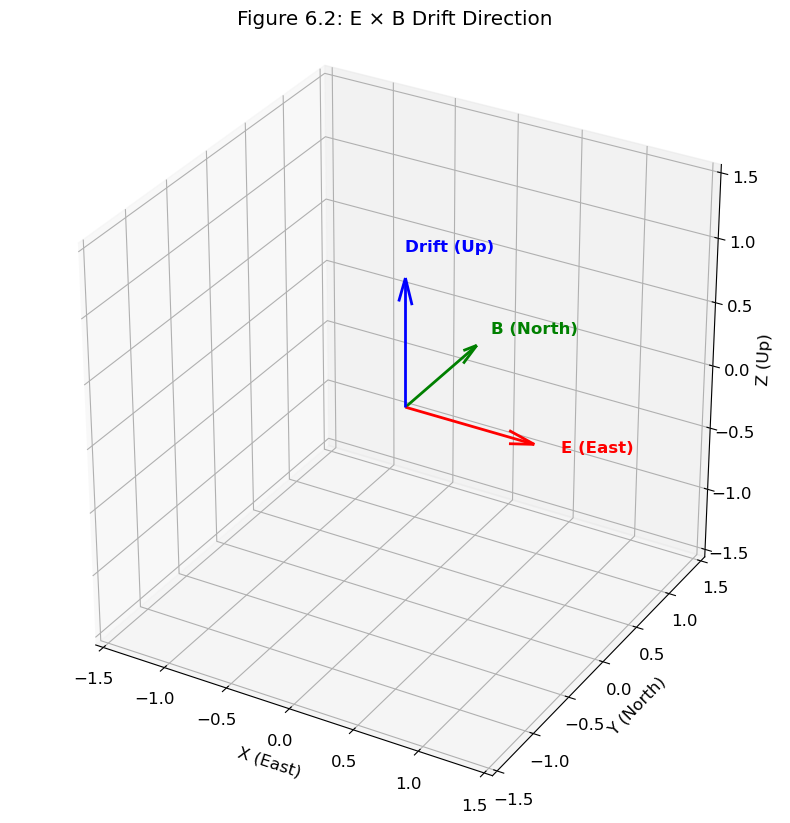

In [25]:
# ======== Plot Direction of Drift Velocity ========

SMALL_SIZE = 12
matplotlib.rc('font', size=SMALL_SIZE)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Define vectors
E = np.array([1, 0, 0])  # downward
B = np.array([0, 1, 0])   # northward
v_d = np.cross(E, B)      # ExB drift

# Function to plot vectors
def plot_vector(ax, vec, color, label):
    ax.quiver(0, 0, 0, vec[0], vec[1], vec[2],
              color=color, arrow_length_ratio=0.2, linewidth=2)
    ax.text(vec[0]*1.2, vec[1]*1.2, vec[2]*1.2, label,
            color=color, fontsize=12, weight='bold')

# Plot all vectors
plot_vector(ax, E, 'red', 'E (East)')
plot_vector(ax, B, 'green', 'B (North)')
plot_vector(ax, v_d, 'blue', 'Drift (Up)')

# Axes settings
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
ax.set_zlim([-1.5, 1.5])
ax.set_xlabel('X (East)')
ax.set_ylabel('Y (North)')
ax.set_zlabel('Z (Up)')
ax.set_box_aspect([1,1,1])
ax.set_title("Figure 6.2: E × B Drift Direction")

plt.show()

- Video 6.1 shows an animated illustration of the drift of ions.

In [ ]:
# Folder path and video filename
video_path = "../data/FountainEffect.mp4""

# Define the video object
video = Video(video_path, embed=True, width=500, height=400)

# Display the video with a caption or source
display(HTML(f"""
<div style="display:inline-block; text-align:center;">
    {video._repr_html_()}
    <div style="text-align:right; font-size:12px; color:gray; margin-top:5px;">
        Source: NASA
    </div>
</div>
"""))

#### Factors Influencing EIA Formation
1. Meridional neutral winds
2. Season: More pronounced during equinoxes
3. Longitude: Varies with longitude
4. Solar condition: Enhanced during intense or high solar activity (more ionization)
5. Geomagnetic condition: Intense geomagnetic condition can enhance or undermine it, depending on the direction of E
6. Time of day: Stronger at local noon and afternoon

### Equatorial Plasma Bubbles (EPBs)

- As the name implies, EPBs are regions of depleted plasma in the equatorial ionosphere. Let's take another mental journey through space.

- So, assuming you are in space, at an altitude of about 300 km. Travel along the magnetic equator. You will observe gutters or depletions of plasma lying along magnetic field lines but across the magnetic equator. 

- These gutters are EPBs and because they lie along magnetic field lines, they are sometimes called Field-Aligned-Irregularities (FAIs). See the snapshot of the equatorial ionosphere observed by NASA's Global-scale Observation of the Limb and Disk (GOLD) instrument on the SES-14 satellite launched in October, 2018. 



In [26]:
# Import GOLD files

# Base directory
base_dir = Path("/media/amadi/amadi_gate1/GOLD_2021/SEL")

# Define metadata for each month
config = {
    "NOVSEL": {"day": 329, "version": "v04"},
    "AUGSEL": {"day": 240, "version": "v05"},
    "MAYSEL": {"day": 128, "version": "v05"},
}

channels = ["CHA", "CHB"]

# Build file list dynamically
sell4 = [
    base_dir / month / f"GOLD_L1C_{ch}_NI1_2021_{cfg['day']}_23_40_{cfg['version']}_r01_c01.nc"
    for month, cfg in config.items()
    for ch in channels
]

# Optional: convert to strings if needed by downstream code
sell4 = [str(f) for f in sell4]

# Print to verify
#for f in sell4:
    #print(f)
#sell4

In [27]:
# === LOAD Gold files and read ===
cordas, fylz, alph = read_gold_files_v2(sell4)

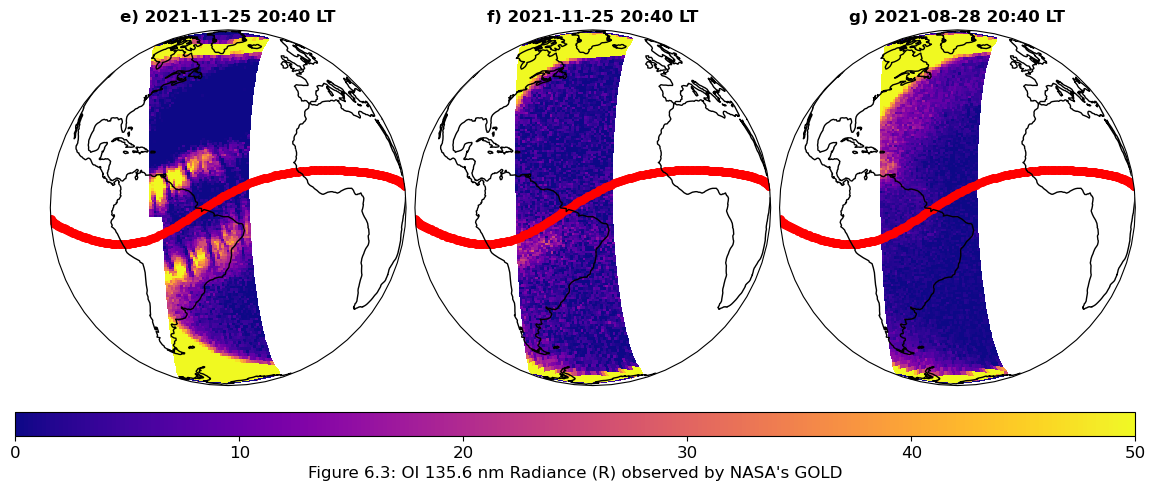

In [30]:
# === PLOT ===

YEAR = 2021
VMIN, VMAX = 0, 50
FIGSIZE = (14, 24)   # Bigger figure for better visibility
SMALL_SIZE = 12

fig = plt.figure(figsize= FIGSIZE)
for i in range(3):
    ax = fig.add_subplot(1, 3, i + 1, projection=ccrs.Orthographic(central_longitude=-40))

    # Overlay two frames (i and i+3)
    for j in (2*i, 2*i + 1):
        im = ax.pcolormesh(
            cordas[1][j], cordas[0][j], cordas[2][j],
            transform=ccrs.PlateCarree(), cmap='plasma', vmin=VMIN, vmax=VMAX
        )

    # Map features
    ax.coastlines()
    ax.set_global()
    ax.set_xlabel('Longitude (deg)')
    ax.set_ylabel('Latitude (deg)')

    # Derive time label from filename
    fname = fylz[i]
    day_num = fname[68:71]
    local_time = f"{int(fname[72:74])-3}:{fname[75:77]}"
    date_str = dt.datetime.strptime(f"{YEAR}-{day_num}", "%Y-%j").strftime("%Y-%m-%d")

    ax.set_title(f"{alph[i]}) {date_str} {local_time} LT", fontsize=12, weight='bold')

    # Plot magnetic equator (assumes dfind is a DataFrame with con_lon/con_lat)
    #Plot Magnetic Equator
    size = 30
    i = 0
    ax.scatter(df2['lon__' + str(i)], df2['lat__' + str(i)], transform=ccrs.PlateCarree(), 
               marker='o', color = 'r', s = size,)

# === COLORBAR ===
cbar_ax = fig.add_axes([0.1, 0.4, 0.8, 0.01])
fig.colorbar(im, cax=cbar_ax, orientation='horizontal', label='Figure 6.3: OI 135.6 nm Radiance (R) observed by NASA\'s GOLD')

plt.subplots_adjust(wspace=0.025, hspace=0.12)

# === SAVE & SHOW ===
#output_path = f"/media/amadi/Amadi_new_drive/PHD_RESEARCH2/GOLD/RESULTS/GOLD_GW_WAVE_4_{YEAR}.jpg"
#plt.savefig(output_path, bbox_inches='tight')
plt.show()

- Observe the dark stripes cutting across the magnetic equator on Figure 6.3a. Those stripes are called EPBs. EPBs are not present everyday as seen on Figures 6.3b and 6.3c. 

#### Formation of EPBs

- The primary driver of EPBs is the Rayleigh-Taylor Instability (RTI), sometimes referred to as Collisional-Interchange Instability (CII).

- RTI is extensively studied by thermodynamic scientist or engineers. This is because in some cases, dense fluid tends to rest over a less dense fluid until a perturbation is introduced. 

- This perturbation introduces an instability that causes the light fluid to force its way upwards into the heavy fluid, by forming bubbles. See Figure 6.4.

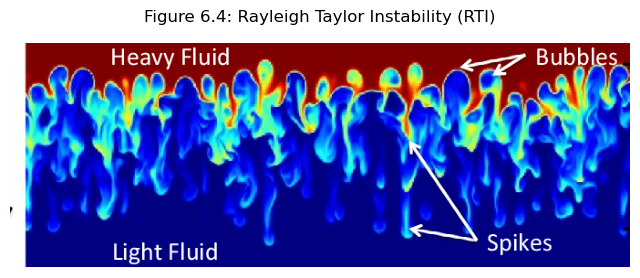

In [39]:
# ===== Import RTI illustration Image =====
img = mpimg.imread('../images/RTI_thermo.png')

plt.figure(figsize=(8, 6))
plt.imshow(img[0:600, 100:780])  # [y1:y2, x1:x2] crop area
plt.axis('off')

# Add a title
plt.title("Figure 6.4: Rayleigh Taylor Instability (RTI)", fontsize=12, pad=15)

plt.show()


#### Three conditions that has to be met for RTI to occur are:

- Difference in density between fluids
- Density gradient must oppose direction of acceleration (g)
- Presence of perturbation

##### Is the first condition met in the evening equatorial ionosphere (plasma)?

- The first condition says, "The density of the fluids has to be different". 

- The layers of the ionosphere respond differently to the absence of solar radiation. 

- Recombination rate (of ions and electrons) in the upper layers is linear (low) but quadratic (higher) in the lower layers of the ionosphere. 

- It means that the density of plasma (ions/electrons) will be higher in the upper than the lower layers of the ionosphere. Hence, this meets the first condition for RTI to occur.

##### Is the second condition met in the evening equatorial ionosphere (plasma)?

- The second condition says, "Density gradient must oppose direction of acceleration (g)". 

- Since the density gradient points in the direction of steepest increase or uphill (higher density), the density gradient points upward while acceleration points downwards. Hence, the second condition is been met.

##### What about the third condition?

- The third condition says, "Presence of perturbation".

- The ionosphere is characterized by tides, waves, neutral winds and localized electric field-induced perturbations.

- These structures introduce perturbations that drives the instability. Hence, the third condition is met.

- Unlike, other regions of the ionosphere, waves propagate upwards in the equatorial ionosphere, hence, more evidence of gravity-driven instabilities.

#### Factors influencing the occurrence of EPBs

1. Meridional neutral winds
2. Season: More pronounced during summer in the American sector
3. Longitude: Varies with longitude
4. Solar condition: Enhanced during intense or high solar activity (more ionization)
5. Geomagnetic condition: Intense geomagnetic condition can enhance or undermine it, depending on the direction of E
6. Time of day: Stronger after 